# <center>Laboratory 7<br>Computing methods</center>

**Instruction:**  
All the exercises from the laboratory must be implemented in [Spyder](https://www.spyder-ide.org/). The report must be sent in [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)  


***Aim of the lab:***  
The aim of the lab is to familiarize with the numerical methods of solving systems of linear equations with non square matrix  ($m\times n$) and [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix). This is the basic task of linear algebra, which we can write as a matrix:  
    
$\mathbf{Ax} =\mathbf{b}$  
    
where $\mathbf{A}$ is the matrix of coefficients on the left side of the equation, the vector $\mathbf{x}$ is the vector of variables and the vector $\mathbf{b}$ of the results of the right side of the equation.

We will use residual to assess the quality of the solution.
$\mathbf{r} = \mathbf{b}-\mathbf{Ax}$

***Exercise 1.***  
We have $ m = 50 $ and $ n = 12 $. Using the linspace function, define the vector $\mathbf{t}$ type $m \times 1$, in which values belong to the range $[0,1]$ and the vector $\mathbf{b}$ type $m\times 1$, whose data values are a function of $\cos(4t)$. Then create the $\mathbf{A}$ matrix with the given formula:  
$\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$  
**Tip**: To define $\mathbf{A}$  can be used the function [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) and [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).

Solve this equation with methods:
1. Use formula $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$  and use function solve.
2. Use [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Use QR method. To create QR matrix can be use function[qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html)
4. SVD methods.
5. Compare calculation time all metods.
6. Compare solution quality.

In [1]:
import numpy as np
import time

m = 50
n = 12
def check_solution_quality(x, A, b):
    r = b - A@x
    print("conditon: {}, norm: {}".format(np.linalg.cond(A), np.linalg.norm(r)))
    return np.linalg.cond(A), np.linalg.norm(r)
t = np.linspace(0.0, 1.0, num=m)
b = np.cos(4*t.reshape(m, 1))
A = np.fliplr(np.vander(t, n))

In [2]:
# 1. 
start = time.time()
x_1 = np.linalg.solve(A.T @ A, A.T @ b)
stop = time.time()
check_solution_quality(x_1, A.T @ A, A.T @ b)
print('time: {} s'.format(stop - start))
# 2. LSTSQ
start = time.time()
x_2, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
stop = time.time()
check_solution_quality(x_2, A, b)
print('time: {} s'.format(stop - start))
# 3. QR 
start = time.time()
Q, R = np.linalg.qr(A)
p = np.dot(Q.T, b)
x_3 = np.dot(np.linalg.inv(R), p)
stop = time.time()
check_solution_quality(x_3, A, b)
print('time: {} s'.format(stop - start))
# 4. SVD 
start = time.time()
U, S, VH = np.linalg.svd(A, full_matrices=False)
x_4 = (VH.T @ np.diag(1/S) @ U.T) @ b
stop = time.time()
check_solution_quality(x_4, A, b)
print('time: {} s'.format(stop - start))

conditon: 1.4082633609831182e+16, norm: 1.8657032840962988e-14
time: 0.030602216720581055 s
conditon: 117177656.20125408, norm: 7.999154262220703e-09
time: 0.0191957950592041 s
conditon: 117177656.20125408, norm: 7.999153928402077e-09
time: 0.0071980953216552734 s
conditon: 117177656.20125408, norm: 8.01949450062142e-09
time: 0.0014240741729736328 s


***Exercise 2.***  
Create the $\mathbf{A}$ matrix with $500 \times 500$ dimensions as follows:
1. Place on the diagonal only ones.
2. Complete the remaining places in the matrix with random numbers from $[-1,1]$ to $\mathbf {A}=\mathbf {A}^{\mathrm {T}}$
3. In the matrix being created, substitute zero for all values that satisfy the condition $| a_{ij}|>\tau $, except those on the diagonal.

**Tip:** For the quick construction of the $\mathbf{A}$ matrix, you can use the functions: [ones](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.ones.html), [diag](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.diag.html?highlight=diag#numpy.diag), [uniform](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.uniform.html?uniformhighlight=#numpy.random.uniform) [tril](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.tril.html), [logical_not](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logical_not.html?highlight=#logical_notnumpy.logical_not)

After generating the matrix $\mathbf {A}$, draw the vector $\mathbf{b}$ with the appropriate dimensions whose values also belong to the range $[-1,1]$ and it creates a layout:
  
$
\mathbf {Ax} = \mathbf {b}
$
  
Complete the following tasks:
1. Check how the matrix conditioning depends on the value of $ \tau =\{0.01.0.05,0.1.0.2,0.5,0.75 \} $. Draw a graph of the dependence of matrix determinants on the value of $ \tau $.
2. For all $\tau$ solve the equation system using the solve function.
3. For all $\tau $ solve the system of equations using the LU distribution, in Python function [lu](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.linalg.lu.html).
4. Use [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) to create sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix) based on the $\mathbf{A} $ arrays obtained in point 1. Then for the obtained matrices using the [bicg](https://docs.scipy.org/doc/scipy/reference/generated/scise.sparse.linalg.bicg.html) which is the implementation of the [coupled gradient method](https://en.wikipedia.org/wiki/Magoda_gradient_fadient) and the [gmres](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html), which is implementation of [Generalized minimal residual method](https://en.wikipedia.org/wiki/Generalized_minimal_residual_method) solve the system of equations.
5. Check how the conditioning of the matrix affects the quality of the system solution by all methods and at the time of their execution. Present your observations on the relevant graphs.

In [3]:
matrix_size = 500
def generate_matrix_a(tau):
    rand_matrix = 2 * np.random.random(size=(matrix_size, matrix_size)) -1
    lower = np.tril(rand_matrix, k=-1)
    tau = 0.1
    lower[np.abs(lower) > tau] = 0
    A = np.identity(matrix_size) + lower + lower.T
    return A

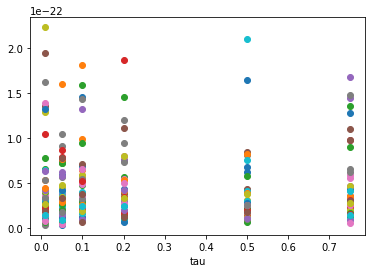

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
tau_list = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
plt.figure()
for i in range(50):
    cond_list = [np.linalg.det(generate_matrix_a(tau)) for tau in tau_list]
    plt.plot(tau_list, cond_list, 'o')
plt.xlabel('tau')
plt.show()

There no observed dependence between tau and matrix determinant

In [30]:
b = 2 * np.random.random(size=(matrix_size,1)) -1
matrix_list = [generate_matrix_a(tau) for tau in tau_list]
solutions_list = [np.linalg.solve(matrix, b) for matrix in matrix_list]

In [32]:
import scipy.linalg
def solve_lu(A, b):
    L, U = scipy.linalg.lu(A,permute_l=True)
    y = np.linalg.inv(L) @ b
    return np.linalg.inv(U) @ y

In [33]:
solutions_lu_list = [solve_lu(matrix, b) for matrix in matrix_list]

Supplementary materials:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Uncle  Google](https://google.pl) i [auntie Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)